# Programming for Data Analytics Project

*Author: Eoghan Walsh*

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import AutoMinorLocator
import seaborn as sns

In [132]:
cork_airport_csv = "./data/cork_airport_weather_hourly.csv"

cork_airport_df = pd.read_csv(cork_airport_csv, skiprows=23, index_col="date", usecols=["date", "rain", "temp", "wdsp"], low_memory=False)

In [133]:
cork_airport_df.head()

,rain,temp,wdsp
date,,,
01-jan-1962 01:00,,-1.1,14
01-jan-1962 02:00,,-1.1,10
01-jan-1962 03:00,,-1.0,12
01-jan-1962 04:00,,-1.6,8
01-jan-1962 05:00,,-2.1,11


In [134]:
cork_airport_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 551520 entries, 01-jan-1962 01:00 to 01-dec-2024 00:00
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   rain    551520 non-null  object 
 1   temp    551520 non-null  float64
 2   wdsp    551520 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 16.8+ MB


In [135]:
cork_airport_df.index = pd.to_datetime(cork_airport_df.index, format="%d-%b-%Y %H:%M")

In [136]:
cork_airport_df["rain"] = pd.to_numeric(cork_airport_df["rain"], errors="coerce")

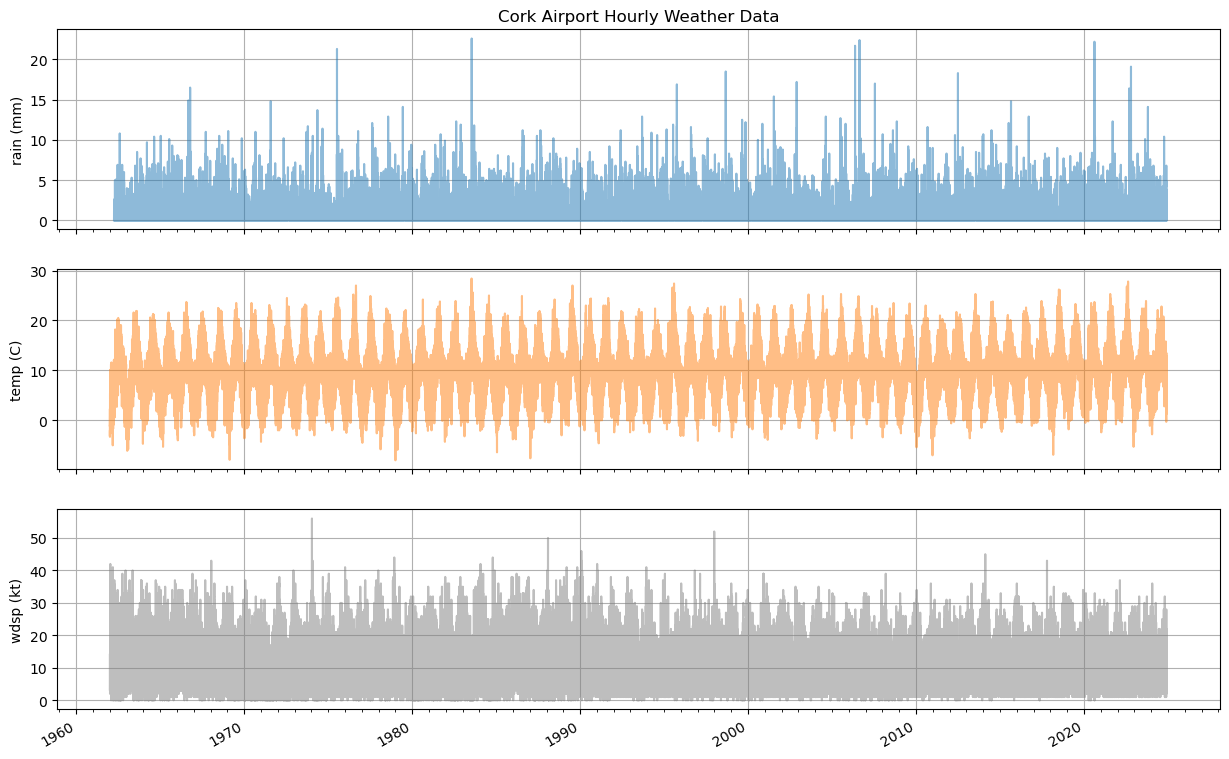

In [138]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(15, 10))

ax1.plot(cork_airport_df["rain"], color="tab:blue", alpha=0.5)
ax2.plot(cork_airport_df["temp"], color="tab:orange", alpha=0.5)
ax3.plot(cork_airport_df["wdsp"], color="tab:gray",alpha=0.5)

locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_minor_locator(AutoMinorLocator(10))
fig.autofmt_xdate()

ax1.set_ylabel("rain (mm)")
ax2.set_ylabel("temp (C)")
ax3.set_ylabel("wdsp (kt)")

for ax in ax1, ax2, ax3:
    ax.grid(True)

ax1.set_title("Cork Airport Hourly Weather Data")

plt.show()

# 